# AKINGBENI - Wrangling and EDA of data science salaries.

In [2]:
#Import libraries

#data wrangling libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import misc libraries
import warnings

#Import pycountry for converting countries name
import pycountry

In [3]:
#Read in the dataset
filepath = "./data/ds_salaries (1).csv"
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Information and introduction about dataset

> Data science was described in 2012 as the sexiest job of the century by [Havard Business Review](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century). At the heart of data science is traditional statistics, computer science and computational power, and business domains. The blend of these three fields in different proportions and perspectives has given rise to varying form of data scientists.

> Some, I am among some, argue that roles like data engineers do fit into the term data scientists, perhaps a full stack data scientists. Popular roles that are common under data science are Data Analytics, Data Scientits, Machine Learning Scientists/Researcher, Machine Learning Engineer and more specific roles like data vizualization experts.

> However, while passion is a great deal in whatever one does. Subjects like salaries and opportunities should not be overlooked when in search of a career path. I personally struggled with these. I still have my reservations, but I will be focusing my story on the data in front of us.


### Introduction about dataset
> The dataset contains salary information of over 600 people of different job levels and seniority levels. It contains years between 2020 - 2022 to capture post covid data science information and salaries.

**Features**
>- work_year: The year the salary was paid.
>- experience_level: The experience level in the job during the year with the following possible values: `EN ---> Entry-level / Junior`, `MI ---> Mid-level / Intermediate`, `SE ---> Senior-level / Expert`, `EX ---> Executive-level / Director`
>- employment_type: The type of employement for the role: `PT ---> Part-time`, `FT ---> Full-time`, `CT ---> Contract`, `FL ---> Freelance`
>- job_title: The role worked in during the year.
>- salary: The total gross salary amount paid.
>- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
>- salaryinusd: The salary in USD (FX rate divided by avg. USD rate for the respective year via [Fx](fxdata.foorilla.com).
>- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
>- remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 = No remote work (less than 20%), 50 = Partially remote, 100 = Fully remote (more than 80%)
>- company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
>- company_size: The average number of people that worked for the company during the year: `S ---> less than 50 employees(small)`, `M ---> 50 to 250 employees (medium)`, `L ---> more than 250 employees (large)`

[Direct info about dataset on kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

### Personal Motivation aboout the project
- I decided to jump on the project first out of curiousity, second to practise and third to learn to use some new libraries like word cloud...

## Data Wrangling

In [4]:
#Check general head information
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
#Visual Assessment
df.sample(6)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
492,492,2022,MI,FT,Data Scientist,150000,PLN,35590,PL,100,PL,L
192,192,2021,MI,FT,Big Data Engineer,18000,USD,18000,MD,0,MD,S
288,288,2021,MI,FT,Machine Learning Engineer,43200,EUR,51064,IT,50,IT,L
497,497,2022,SE,FT,Data Scientist,165000,USD,165000,US,100,US,M
107,107,2021,SE,FT,Data Engineer,115000,USD,115000,US,100,US,S
439,439,2022,SE,FT,Machine Learning Engineer,164996,USD,164996,US,0,US,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
#check the unique values in the work_year columns
df.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [8]:
#Check unique values of experience_level is as expeected

df.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [9]:
#Check unique values of employment types
df.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [10]:
#Chech value counts of different job titles
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [11]:
df.employee_residence.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'PL',
       'PT', 'CN', 'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'PH', 'ES',
       'DK', 'RU', 'IT', 'HR', 'BG', 'SG', 'BR', 'IQ', 'VN', 'BE', 'UA',
       'MT', 'CL', 'RO', 'IR', 'CO', 'MD', 'KE', 'SI', 'HK', 'TR', 'RS',
       'PR', 'LU', 'JE', 'CZ', 'AR', 'DZ', 'TN', 'MY', 'EE', 'AU', 'BO',
       'IE', 'CH'], dtype=object)

In [12]:
#Check unique values in company size
df.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

### Data Assessments

- Redundant columns ---> salary, salary_currency, Unnamed column irrelevant, a product of not ignoring the index when it was saved
- work year column should be datetime datatype
- Infromation shorthand entry in experience level is ambigous
- Experience level should be an ordered category type
- Columns of employment type contains ambigous values
- There are varying form of job description in the job title column of the same job. (#Define function that uses str.contains to replace certain job types.)
- Employe Residence and company loaction is ambigous.
- Remote Ratio values can be misleading and data type ought to be string or object
- Company size is an ordinal datatype and should be ordered from small to medium and to large. (Also needs renaming)

### Data Cleaning

In [13]:
#make copy of original dataframe
df_clean = df.copy()

In [14]:
#Check shape of original df before cleaning
df_clean.shape

(607, 12)

### At this stage, cleaning proper begins using the define, code and test framework.

#### Redundant columns ---> salary, salary_currency, Unnamed column irrelevant, a product of not ignoring the index when it was saved

> #### Define
>- drop redundant columns (unnamed, salary, salary_currency)

#### Code

In [15]:
#Drop redundant columns
df_clean.drop(columns = ["Unnamed: 0", "salary", "salary_currency"], inplace = True)

#### Test

In [16]:
cols = ["Unnamed: 0", "salary", "salary_currency"]
[col in df_clean.columns for col in cols] #Check if each dropped column is in df_clean

[False, False, False]

#### Work year column should be datetime datatype

> #### Define
> - Convert work year column to datetime object

#### Code

In [17]:
#Use pd datetime to convert to dataetime object

df_clean["work_year"] = pd.to_datetime(df.work_year, format = "%Y")

#### Test

In [18]:
df_clean.work_year.dtype

dtype('<M8[ns]')

#### Infromation shorthand entry in experience level is ambigous and no category ordering

> #### Define
>- Use the series.map to replace the values
>- Use pd.api to convert to category datatype with order

#### Code

In [19]:
df_clean.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [20]:
#Construct dictionary to replace specific values
sh_exp = list(df_clean.experience_level.unique())
full_exp = ["Mid-level", "Senior-level", "Entry-level", "Executive-level"]
experience_dict = dict(zip(sh_exp, full_exp))
experience_dict

{'MI': 'Mid-level',
 'SE': 'Senior-level',
 'EN': 'Entry-level',
 'EX': 'Executive-level'}

In [21]:
#Replace values of experience level
df_clean["experience_level"] = df_clean.experience_level.map(experience_dict)

In [22]:
#Converting experience level to ordered category type
ordered_experience = ["Entry-level", "Mid-level", "Senior-level", "Executive-level"]
experience_dtype = pd.api.types.CategoricalDtype(categories = ordered_experience, ordered=True)
df_clean["experience_level"] = df_clean.experience_level.astype(experience_dtype)

#### Test

In [23]:
df_clean["experience_level"].unique()

['Mid-level', 'Senior-level', 'Entry-level', 'Executive-level']
Categories (4, object): ['Entry-level' < 'Mid-level' < 'Senior-level' < 'Executive-level']

#### Columns of employment type contains ambigous values

> #### Define
> - Use pd series.map to replace values

#### Code

In [24]:
#Creating dictionary for mapping
sh_emp_type = list(df_clean.employment_type.unique())
emp_type_full = ["Full Time", "Contract", "Part Time", "Freelance"]
emp_type_dict = dict(zip(sh_emp_type, emp_type_full))

In [25]:
#Renaming values using the series.map method

df_clean["employment_type"] = df_clean.employment_type.map(emp_type_dict)

#### Test

In [26]:
df_clean.employment_type.unique()

array(['Full Time', 'Contract', 'Part Time', 'Freelance'], dtype=object)

#### There are varying form of job description in the job title column of the same job.

> #### Define
>- Convert job description column to lower case character
> - Define function that replaces the chaarcters based on certain conditions

#### Code

In [27]:
#Convert job_title to lower character

df_clean["job_title"] = df_clean.job_title.str.lower()

In [28]:
#Define function for converting strings in job title column
def str_replace(row):
    
    """Function replaces the values 
    with appropriate data science roles. E.g 
    ML with machine learning"""
    
    if "data sci" in row:
        return "Data Scientist"
    elif "data engineer" in row:
        return "Data Engineer"
    elif "data analy" in row:
        return "Data Analyst"
    elif "machine learning" in row:
        return "Machine Learning"
    elif row in ["ml engineer", "computer vision engineer", 
                 "computer vision software engineer", "nlp engineer", 
                 "3d computer vision researcher", "ai scientist"]:
        return "Machine Learning"
    elif "data architect" in row:
        return "Data Architect"
    elif row == "etl developer":
        return "Data Engineer"
    elif row in ["data specialist", "head of data"]:
        return "Data Scientist"
    else:
        return row

In [29]:
#Apply function defined above

df_clean["job_title"] = df_clean["job_title"].apply(str_replace)

#capitalize each word to have uniformity

df["job_title"] = df_clean["job_title"].str.capitalize()

#### Test

In [30]:
df["job_title"].value_counts()

Data scientist        198
Data engineer         160
Data analyst          131
Machine learning       86
Research scientist     16
Data architect         12
Analytics engineer      4
Name: job_title, dtype: int64

#### Employe Residence and Company loaction is ambigous.

> #### Define
> - Use pyconutry library to replace short hand names

#### Code

In [31]:
#Use pycountry to extarct country names
df_clean["employee_residence"] = [pycountry.countries.get(alpha_2 = country).name for country in df_clean.employee_residence]
df_clean["company_location"] = [pycountry.countries.get(alpha_2 = country).name for country in df_clean.company_location]

#### Test

In [32]:
df_clean["employee_residence"].unique()[:10]

array(['Germany', 'Japan', 'United Kingdom', 'Honduras', 'United States',
       'Hungary', 'New Zealand', 'France', 'India', 'Pakistan'],
      dtype=object)

In [33]:
df_clean["company_location"].unique()[:10]

array(['Germany', 'Japan', 'United Kingdom', 'Honduras', 'United States',
       'Hungary', 'New Zealand', 'France', 'India', 'Pakistan'],
      dtype=object)

#### Remote Ratio values can be misleading and data type ought to be string or object

> #### Define
> - Convert values to appropriate names
>- Ensure the datatype is object

#### Code

In [34]:
#Create map dictionary for mapping with remote_ratio

remote_map = {0: "<20% Remote",
             50: "Partial Remote",
             100: ">80% Remote"}

In [35]:
#Assign new mapping to the column

df_clean["remote_ratio"] = df_clean.remote_ratio.map(remote_map)

#### Test

In [36]:
df_clean.remote_ratio.unique()

array(['<20% Remote', 'Partial Remote', '>80% Remote'], dtype=object)

#### Company size is an ordinal datatype and should be ordered from small to medium and to large. (Also needs renaming)

> #### Define
> - Rename values and convert data to an ordered category

#### Code

In [37]:
#make map dictionary for renameing

size_map = {"L": "Large",
           "S": "Small",
           "M": "Medium"}

#Rename values in the comapny size column
df_clean["company_size"] = df_clean.company_size.map(size_map)

In [38]:
#Create ordered category
size_list = ["Small", "Medium", "Large"]
size_cat = pd.api.types.CategoricalDtype(categories=size_list, ordered=True)

#Change category to ordered category
df_clean["company_size"] = df_clean["company_size"].astype(size_cat)

#### Test

In [39]:
df_clean.company_size.unique()

['Large', 'Small', 'Medium']
Categories (3, object): ['Small' < 'Medium' < 'Large']

## Exploratory Data Analysis

> *We will be using the question-vizulaization-observation framework in this section. And the sections will be split into investigating univariate plots, bivariate plots and multivariate plots*

### General data description

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   work_year           607 non-null    datetime64[ns]
 1   experience_level    607 non-null    category      
 2   employment_type     607 non-null    object        
 3   job_title           607 non-null    object        
 4   salary_in_usd       607 non-null    int64         
 5   employee_residence  607 non-null    object        
 6   remote_ratio        607 non-null    object        
 7   company_location    607 non-null    object        
 8   company_size        607 non-null    category      
dtypes: category(2), datetime64[ns](1), int64(1), object(5)
memory usage: 34.8+ KB


In [41]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020-01-01,Mid-level,Full Time,Data Scientist,79833,Germany,<20% Remote,Germany,Large
1,2020-01-01,Senior-level,Full Time,Machine Learning,260000,Japan,<20% Remote,Japan,Small
2,2020-01-01,Senior-level,Full Time,Data Engineer,109024,United Kingdom,Partial Remote,United Kingdom,Medium
3,2020-01-01,Mid-level,Full Time,Data Analyst,20000,Honduras,<20% Remote,Honduras,Small
4,2020-01-01,Senior-level,Full Time,Machine Learning,150000,United States,Partial Remote,United States,Large


In [42]:
df_clean.select_dtypes("object").describe()

,employment_type,job_title,employee_residence,remote_ratio,company_location
count,607,607,607,607,607
unique,4,7,57,3,50
top,Full Time,Data Scientist,United States,>80% Remote,United States
freq,588,198,332,381,355


In [43]:
df_clean.select_dtypes("number").describe()

,salary_in_usd
count,607.000000
mean,112297.869852
std,70957.259411
min,2859.000000
25%,62726.000000
50%,101570.000000
75%,150000.000000
max,600000.000000


In [44]:
df_clean.select_dtypes("category").describe()

,experience_level,company_size
count,607,607
unique,4,3
top,Senior-level,Medium
freq,280,326


From the above summary statistics, we know the following:
- Most of the employment type is Full time
- The highest frequency ocunts of job_title is data scientist
- The employee residence and company location have United States as their highest frequency count.
- The highest frequency count of the experience_level is the senir level
- The mean salary for data science job is $112,672

### Univariate Analysis

#### What is the distribution of the experience_level?

In [46]:
#Generate base color
base_color = sns.color_palette()[0]

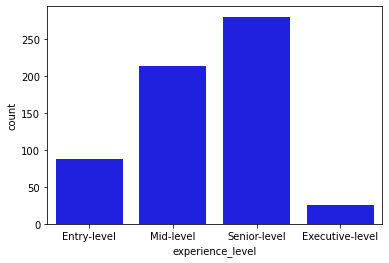

In [47]:
#distribution of experience level

sns.countplot(data= df_clean, x = "experience_level", color = "b");

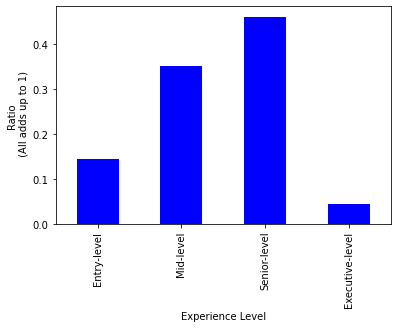

In [48]:
#Make plot relative
df_clean["experience_level"].value_counts(normalize = True).sort_index().plot(kind = "bar", color = "b")
plt.xlabel("Experience Level")
plt.ylabel("Ratio\n (All adds up to 1)");

**Observation:** The data consists mostly of Mid-level roles and Senior-level roles with a little over 10% as entry roles and less than 10% Executive roles.

#### Question: What is the distribution of employment type?

<AxesSubplot:xlabel='employment_type', ylabel='count'>

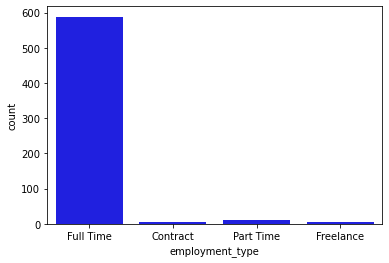

In [49]:
sns.countplot(data = df_clean, x = "employment_type", color = "b")

**Observation:** Most of the jobs in the dataset are `full time` with very inconsequential amount attributed to other `employment type`

#### Question: Distribution of salary?

In [51]:
df_clean.salary_in_usd.describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

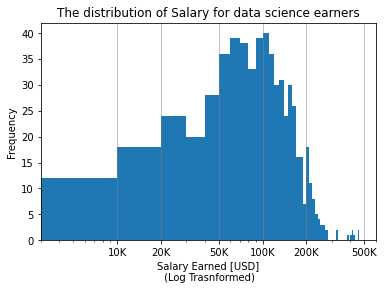

In [64]:
bins = np.arange(0, 600000, 10000)
plt.hist(data = df_clean, x = "salary_in_usd", bins = bins)
plt.xscale("log")
ticks = [1000, 10000, 20000, 50000, 100000, 200000, 500000]
tick_label = ["1K", "10K", "20K", "50K", "100K", "200K", "500K"]
plt.xticks(ticks, tick_label)
plt.xlim(3000, 600000)
plt.grid(axis = "x", alpha = 0.6, color = "grey")
plt.xlabel("Salary Earned [USD]\n (Log Trasnformed)")
plt.ylabel("Frequency")
plt.title("The distribution of Salary for data science earners");

**Observation:** 
- The distribution of Data Science Salaries mainly between 50K to above 100K but less than 200K
- We also observe a general gradual increase in the different income groups which peaks at area between 50K - 100K and then begin to suffer decline.
- There are extreme outliers at above 200K.
- This dataset can point to the distribution of work experience that we have in the dataset, an information we would get to know better on a  bivariate plot.

In [65]:
#Trying to see the outliers of above 200K
df_clean[df_clean["salary_in_usd"] > 200000]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2020-01-01,Senior-level,Full Time,Machine Learning,260000,Japan,<20% Remote,Japan,Small
25,2020-01-01,Executive-level,Full Time,Data Scientist,325000,United States,>80% Remote,United States,Large
33,2020-01-01,Mid-level,Full Time,research scientist,450000,United States,<20% Remote,United States,Medium
37,2020-01-01,Entry-level,Full Time,Machine Learning,250000,United States,Partial Remote,United States,Large
63,2020-01-01,Senior-level,Full Time,Data Scientist,412000,United States,>80% Remote,United States,Large
74,2021-01-01,Executive-level,Full Time,Data Scientist,235000,United States,>80% Remote,United States,Large
78,2021-01-01,Mid-level,Contract,Machine Learning,270000,United States,>80% Remote,United States,Large
93,2021-01-01,Senior-level,Full Time,Data Engineer,276000,United States,<20% Remote,United States,Large
97,2021-01-01,Mid-level,Full Time,Data Analyst,450000,United States,>80% Remote,United States,Large
115,2021-01-01,Entry-level,Full Time,Machine Learning,225000,United States,>80% Remote,United States,Large


**Observation**
- Dominated by the country: United States, most earners above 200K are Senior Level, Executive with few Mid levels and two entry level which both have job title as Machine Learning (Remember, I combined many sub fields, Ml engineer, Ml Scientist, AI scientist, e.t.c.). I do however consider both entry level in this situation as an outrageous outlier and needs to dropped from the dataset to avoid skewness of analysis

In [76]:
#Create logical mask series for subsetting the data and dropping them
mask_entry = df_clean["experience_level"] == "Entry-level"
mask_200K = df_clean["salary_in_usd"] > 200000

df_clean.drop(df_clean[mask_entry & mask_200K].index, inplace = True)

In [89]:
#Test -- check index 37 and index 115

df_clean.iloc[[37, 115], :]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
38,2020-01-01,Entry-level,Full Time,Data Analyst,10000,Nigeria,>80% Remote,Nigeria,Small
116,2021-01-01,Mid-level,Full Time,Data Scientist,50000,Nigeria,>80% Remote,Nigeria,Large


**How does the adoption of remote work look like in Data Science Roles?**

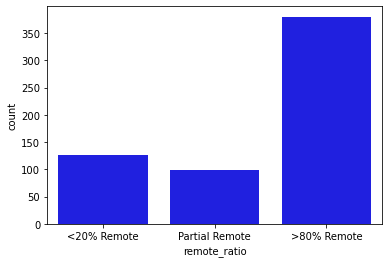

In [93]:
sns.countplot(data = df_clean, x = "remote_ratio", color = "b");

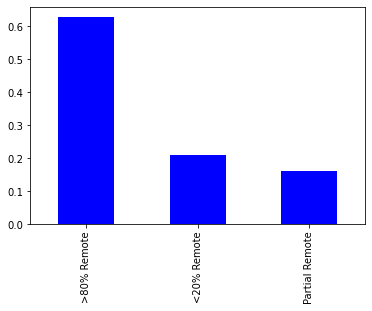

In [95]:
#Make above plot into a relative plot
df_clean["remote_ratio"].value_counts(normalize = True).plot(kind = "bar", color = "b");

**Observation**
- More than 60% of work presented in the dataset has high remote culture (>80% Remote)

In [96]:
df_clean.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020-01-01,Mid-level,Full Time,Data Scientist,79833,Germany,<20% Remote,Germany,Large
1,2020-01-01,Senior-level,Full Time,Machine Learning,260000,Japan,<20% Remote,Japan,Small
2,2020-01-01,Senior-level,Full Time,Data Engineer,109024,United Kingdom,Partial Remote,United Kingdom,Medium
3,2020-01-01,Mid-level,Full Time,Data Analyst,20000,Honduras,<20% Remote,Honduras,Small
4,2020-01-01,Senior-level,Full Time,Machine Learning,150000,United States,Partial Remote,United States,Large


#### What is the company size distribution?

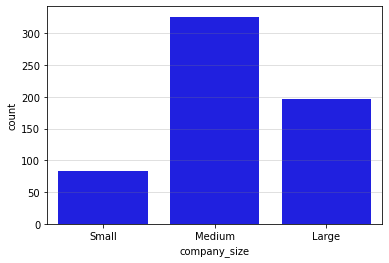

In [104]:
sns.countplot(data = df_clean, x = "company_size", color = "b")
plt.grid(axis = "y", color = "grey", alpha = 0.3);

**Obseravtion**
- Medium companies have the highest bar.

#### What is the distribution of the job_title?

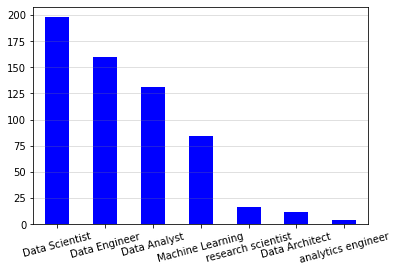

In [108]:
df_clean["job_title"].value_counts().plot(kind = "bar", color = "b")
plt.grid(axis = "y", color = "grey", alpha = 0.3)
plt.xticks(rotation = 15);

**Observation**
- The role of a data scientist takes the lead followed by the role of a data engineer, then the role of a data analyst, followed by machine learning and the rest...

## Conclusion


## Limitations

- The year is very limited and does not contain before 2020, for proper comparison between pre-covid and post-covid times.